[('table', 'numbs', 'numbs', 2, 'CREATE TABLE numbs (Date date, Num1 real, Num2, real)'), ('table', 'number', 'number', 3, 'CREATE TABLE number (Date date, Num1 real, Num2 real)')]


/tmp/ipykernel_1194/2373213563.py:22: DeprecationWarning: The default datetime adapter is deprecated as of Python 3.12; see the sqlite3 documentation for suggested replacement recipes
  con.execute("INSERT INTO number VALUES (?, ?, ?)", (now, row[0], row[1]))


('2025-05-28 19:13:56.256653', 1.0, 2.0)
('2025-05-28 19:13:56.257082', 1.0, 2.0)
('2025-05-28 19:13:56.257100', 1.0, 2.0)
('2025-05-28 19:13:56.257107', 1.0, 2.0)
['2017-01-01T00:00' '2017-01-01T00:01' '2017-01-01T00:02' ...
 '2023-01-31T23:57' '2023-01-31T23:58' '2023-01-31T23:59'] 3199680
[('2017-01-01T00:00', -1.1151, -0.5811)
 ('2017-01-01T00:01', -0.3811,  1.2438)
 ('2017-01-01T00:02', -0.3742, -1.0285)
 ('2017-01-01T00:03',  0.8134, -1.0407)
 ('2017-01-01T00:04', -0.7141,  0.0823)]
CPU times: user 0 ns, sys: 53.4 ms, total: 53.4 ms
Wall time: 61.2 ms
CPU times: user 0 ns, sys: 15.7 ms, total: 15.7 ms
Wall time: 16.9 ms
[(0.2852, 0.8016, 0.534, 0.3412, 0.1797), (-0.1118, -1.3955, -1.9624, -0.1434, -0.5594), (0.9645, 1.1628, 0.3317, -2.2393, 1.1733), (0.1267, 1.7626, -1.4699, 0.7313, -1.0096)]
      NO1     NO2     NO3     NO4     NO5
0  0.2852  0.8016  0.5340  0.3412  0.1797
1 -0.1118 -1.3955 -1.9624 -0.1434 -0.5594
2  0.9645  1.1628  0.3317 -2.2393  1.1733
3  0.1267  1.7626 -1.4

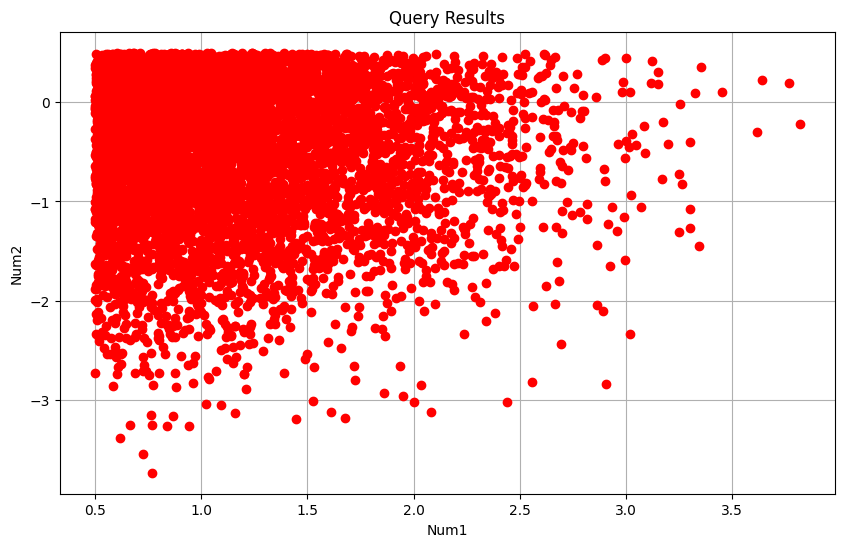

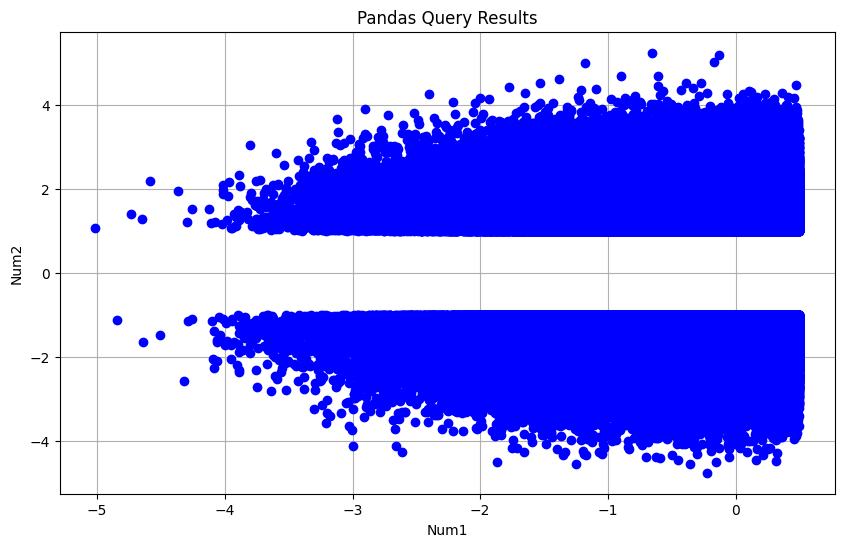

CPU times: user 8.76 s, sys: 353 ms, total: 9.11 s
Wall time: 9.88 s
CPU times: user 848 ms, sys: 194 ms, total: 1.04 s
Wall time: 1.13 s
         Unnamed: 0     NO1     NO2     NO3     NO4     NO5
0                 0  0.2852  0.8016  0.5340  0.3412  0.1797
1                 1 -0.1118 -1.3955 -1.9624 -0.1434 -0.5594
2                 2  0.9645  1.1628  0.3317 -2.2393  1.1733
3                 3  0.1267  1.7626 -1.4699  0.7313 -1.0096
4                 4 -0.4225  2.3588 -0.5534 -2.4642 -0.6046
...             ...     ...     ...     ...     ...     ...
3199995     3199995 -0.9183 -0.4332  0.6127  0.2818  1.0233
3199996     3199996  0.5674  0.0553  1.6884  0.2243  0.4038
3199997     3199997 -0.8020 -3.4738  0.9265  1.1340 -0.5555
3199998     3199998  0.0089 -0.5641 -0.4367 -2.3649  0.9669
3199999     3199999  0.8357 -1.9801 -1.8894  1.4120  0.3981

[3200000 rows x 6 columns]
/ints_float (Table(np.int64(0),)) np.str_('Integers and Floats')
CPU times: user 2 μs, sys: 0 ns, total: 2 μs
Wall

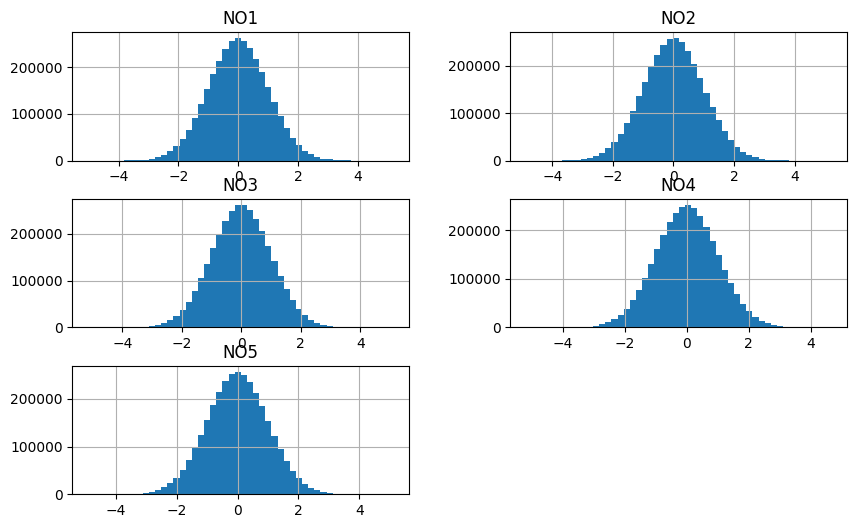

In [ ]:
import sqlite3 as sq3
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tables as tb
path = "\\Users\\Justi\\Documents"

con = sq3.connect(path + "numb.db")

query = "CREATE TABLE number (Date date, Num1 real, Num2 real)"

#con.execute(query)
con.commit()

print(con.execute("SELECT * FROM sqlite_master").fetchall())


data = np.random.standard_normal((100000, 2))
for row in data:
    now = dt.datetime.now() # Get the current date and time
    con.execute("INSERT INTO number VALUES (?, ?, ?)", (now, row[0], row[1])) 
    # insert data into the table for each row the data array 
con.commit()
## Fetch and print the first 4 rows from the table
con.execute('SELECT * FROM number').fetchmany(4)
# create a cursor object to execute SQL commands
pointer = con.execute('SELECT * FROM number')
# Fetch and print the first 4 rows from the table
for i in range(4):
    print(pointer.fetchone())  

rows = pointer.fetchall()
rows[:3]

"""Reading and writing NumPy Arrays
"""
# Create a date range with a specific frequency
dtimes = np.arange('2017-01', '2023-02', dtype='datetime64[m]')

print(dtimes, len(dtimes)) 

# creates a special dtype ocject for structured arrays
# special dtype is used to define the structure of the array
dty = np.dtype([('date', 'datetime64[m]'), ('Num1', 'f8'), ('Num2', 'f8')])
# Create an empty structured array with the specified dtype
# it has the same length as the date range
data = np.zeros(len(dtimes), dtype=dty)

# Fill the structured array with data
data['date'] = dtimes
"""Generate random data for Num1 and Num2 columns
the numners are generated from a standard normal distribution with the shape of the date
range rounded to 4 decimal places"""
a = np.random.standard_normal((len(dtimes), 2)).round(4)
# Assign the generated numbers to the Num1 and Num2 columns of the structured array
# a is a 2D array with shape (len(dtimes), 2)
# Assign the first column of a to Num1 and the second column to Num2
data['Num1'] = a[:, 0]
data['Num2'] = a[:, 1]

# Print the first 5 rows of the structured array
print(data[:5])
data.nbytes

%time np.save(path + "\\data.npy", data)
# Load the structured array from the .npy file

%time data_loaded = np.load(path + "\\data.npy")
""" I/O with Pandas
"""
# craetes a numpy array with random numbers
data_pd = np.random.standard_normal((100000, 5)).round(4)

# SQL Databases


filename = path + "numbers_pd"
# Create a connection to the SQLite database file with the specified filename
con = sq3.Connection(filename + ".db")
# creates a table  with 5 columns named NO1, NO2, NO3, NO4, and NO5
query_pd = "CREATE TABLE numbers (NO1 real, NO2 real, NO3 real, NO4 real, NO5 real)"
q = con.execute
qm = con.executemany
#q(query_pd)


# Insert the data into the table
qm("INSERT INTO numbers VALUES (?, ?, ?, ?, ?)", data_pd)
con.commit()
# Fetch and print the first 4 rows from the table
pointer_pd = q('SELECT * FROM numbers').fetchall()
print(pointer_pd[:4])
query = "SELECT * FROM numbers WHERE NO1 > 0.5 and No2 < 0.5"
res = np.array(q(query).fetchall()).round(4) # a ndarray with the results of the query
res = res[::100]  # Select every 100th row
plt.figure(figsize=(10, 6)) # Set the figure size
plt.title("Query Results") # Set the title of the plot
plt.xlabel("Num1") # Set the x-axis label
plt.ylabel("Num2") # Set the y-axis label
plt.grid(True) # Enable the grid for better readability
plt.plot(res[:, 0], res[:, 1], "ro") # plot the first two columns of the result as red dots

# convert the result to a pandas DataFrame
data_sql_pd = pd.read_sql("Select * from numbers", con)
print(data_sql_pd.head())

q = "(NO1 < 0.5 | NO1 < 0.5) & ( NO2 < -1 | NO2 > 1)"
res_pd = data_sql_pd[["NO1", "NO2"]].query(q).round(4)  # query the DataFrame with the specified condition
plt.figure(figsize=(10, 6))  # Set the figure size
plt.title("Pandas Query Results")  # Set the title of the plot
plt.xlabel("Num1")  # Set the x-axis label
plt.ylabel("Num2")  # Set the y-axis label
plt.grid(True)  # Enable the grid for better readability
plt.plot(res_pd["NO1"], res_pd["NO2"], "bo")  # plot the first two columns of the result as blue dots
plt.show()  # Show the plot

# working with CSV files
%time data_sql_pd.to_csv(filename + ".csv") # Save the DataFrame to a CSV file writes the data to disk
# Load the CSV file into a memory as a new DataFrame
%time data_sql_pd_csv = pd.read_csv(filename + ".csv")  # Load the CSV file into a DataFrame
print(data_sql_pd_csv)  # Create histograms for the specified columns
data_sql_pd_csv.hist(column=["NO1", "NO2", "NO3", "NO4", "NO5"], bins=50, figsize=(10, 6))  # Create histograms for the specified columns

#working with tables

filename = path + "pytab.h5"
 # Close all open HDF5 files to avoid conflicts

h5 = tb.open_file(filename, "w")

row_des = {
    "Date": tb.StringCol(26, pos=1), # a string column with a maximum length of 26 characters
    "No1":tb.IntCol(pos=2), # an integer column
    "No2": tb.IntCol(pos=3), # an integer column
    "No3": tb.Float64Col(pos=4), # a float column with 
    "No4": tb.Float64Col(pos=5) # a float column with 
}

rows = 2000000

filters = tb.Filters(complevel=0)
# Create a table in the HDF5 file with the specified row description and filters
tab = h5.create_table("/", "ints_float",
 row_des,
  title="Integers and Floats",
   filters=filters
)

print(tab)

# Create a row object to insert data into the table
pointer = tab.row

ran_int = np.random.randint(0, 10000, size=(rows,2))

ran_flo = np.random.standard_normal((rows, 2)).round(4)

%time
for i in range(rows):
    pointer["Date"] = dt.datetime.now()
    pointer["No1"] = ran_int[i, 0]
    pointer["No2"] = ran_int[i,1]
    pointer["No3"] = ran_flo[i,1]
    pointer["No4"] = ran_flo[i,0]
    pointer.append()
tab.flush()

print(tab)

dty = np.dtype([("Date", "S26"), ("No1", "<i4"), ("No2", "<i4"), ("No3", "<f8"), ("No4", "<f8")])

sarray = np.zeros(len(ran_int), dtype=dty)

